In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Open Data</h3>

In [72]:
df = pd.read_csv('test.csv')

<h3>Analyze Data</h3>

In [73]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [74]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [75]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

<h3>Find Missing Values</h3>

In [76]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

We can see we are only missing at most 1-2% of the data.
My first thought was that maybe the same rows just don't have values for a lot of the features giving a similar percentage in missing data.

In [77]:
percent_nan = percent_missing(df)
percent_nan

VRDeck          1.870470
RoomService     1.917232
HomePlanet      2.034136
Age             2.127660
Destination     2.151040
CryoSleep       2.174421
VIP             2.174421
Name            2.197802
ShoppingMall    2.291326
Cabin           2.338087
Spa             2.361468
FoodCourt       2.478373
dtype: float64

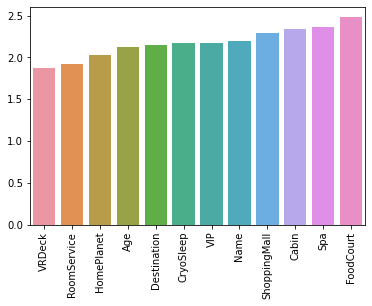

In [78]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

I took the feature VIP, since it is in the middle, to see about how many rows we have missing data, so about 93 give or less

In [79]:
df[df['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
42,0100_01,Earth,False,G/13/P,TRAPPIST-1e,NaN,NaN,0.0,17.0,997.0,0.0,0.0,Dary Cochrisons
93,0209_01,Europa,False,B/10/P,TRAPPIST-1e,36.0,NaN,33.0,NaN,0.0,12767.0,1193.0,Grasath Clindy
101,0228_02,Europa,False,B/4/S,55 Cancri e,39.0,NaN,0.0,25273.0,0.0,13.0,1714.0,Zedark Asharing
148,0325_01,Earth,False,G/54/P,TRAPPIST-1e,48.0,NaN,NaN,755.0,0.0,0.0,0.0,Searla Mccarveymon
150,0329_01,Europa,True,B/14/P,55 Cancri e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Iononus Rewmid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,8875_02,Europa,False,C/330/S,TRAPPIST-1e,32.0,NaN,26.0,1708.0,0.0,3993.0,481.0,Alar Oillicaly
4087,8895_01,Europa,True,C/294/P,TRAPPIST-1e,39.0,NaN,0.0,0.0,0.0,0.0,0.0,Astrak Hossive
4176,9058_01,Mars,False,NaN,TRAPPIST-1e,38.0,NaN,784.0,0.0,42.0,38.0,10.0,Hammet Muff
4250,9228_01,Earth,False,F/1887/P,TRAPPIST-1e,21.0,NaN,640.0,0.0,21.0,0.0,76.0,Davis Bulliamoses


<h3>Feature Engineering</h3>

We look at each feature of data missing and see if we can save the data instead of dropping the feature

From the description we can see that the columns RoomService, FoodCourt, ShoppingMall, Spa, VRDeck. Are all bill amounts that each passanger has billed at the Space Titanic. By this we can assume if it's NaN it was probably 0

In [80]:
columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df[columns] = df[columns].fillna(0)

Now we can see that it took care of 5 features

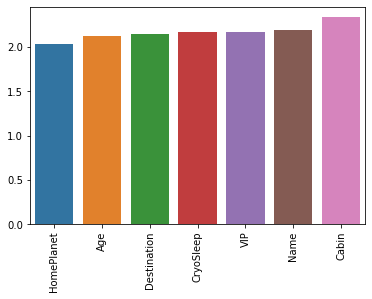

In [81]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Using the same logic, VIP is a True or False value in which the passanger has purchased a VIP ticket. Logically we can fill the NaN values with False, since most likely those passagners did not purchase any.

We can see that only 74 passangers purchase it, and most people did not

In [82]:
df['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [83]:
df['VIP'] = df['VIP'].fillna(False)

This can be also applied to CryoSleep as it was a choice if to be put in it or not

In [84]:
df['CryoSleep'].value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [85]:
df['CryoSleep'] = df['CryoSleep'].fillna(False)

We are left now with only 5 features

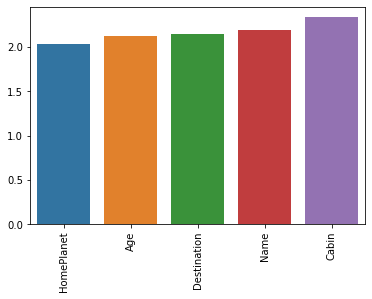

In [86]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

First we look at Home Planet

In [87]:
df[df['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
276,0616_01,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,0.0,1154.0,1025.0,Arkaban Spriney
340,0730_01,NaN,False,F/135/S,TRAPPIST-1e,44.0,False,14.0,0.0,1817.0,2.0,171.0,Skunch Ponie
450,0936_01,NaN,False,F/171/S,TRAPPIST-1e,20.0,False,0.0,4.0,0.0,732.0,1.0,Anniey Currisones
464,0967_01,NaN,False,F/180/S,TRAPPIST-1e,19.0,False,1.0,0.0,0.0,0.0,632.0,Andan Fryan
481,1021_01,NaN,False,F/192/S,TRAPPIST-1e,23.0,False,0.0,458.0,151.0,256.0,0.0,Mara Ments
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,8621_01,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders
3980,8678_01,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Eilan Kellson
4032,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted
4159,9025_01,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,Ale Whitersone


In [88]:
df['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

we are missing 87 rows, so what I am thinking is that using passengerId we can find who else the passanger of missing Homeplanet was traveling with. find a percentage of the likely home planet within that group.

For that we can split the passenger id into two features
gggg_pp -> [gggg] instead

In [89]:
df['Group'] = df['PassengerId'].str.split('_',expand=True)[0]
df = df.drop(['PassengerId'],axis=1)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273


Now we go back to see how many value counts of home planets within same groups

In [107]:
df[df['HomePlanet'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group
276,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,0.0,1154.0,1025.0,Arkaban Spriney,0616
340,NaN,False,F/135/S,TRAPPIST-1e,44.0,False,14.0,0.0,1817.0,2.0,171.0,Skunch Ponie,0730
450,NaN,False,F/171/S,TRAPPIST-1e,20.0,False,0.0,4.0,0.0,732.0,1.0,Anniey Currisones,0936
464,NaN,False,F/180/S,TRAPPIST-1e,19.0,False,1.0,0.0,0.0,0.0,632.0,Andan Fryan,0967
481,NaN,False,F/192/S,TRAPPIST-1e,23.0,False,0.0,458.0,151.0,256.0,0.0,Mara Ments,1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders,8621
3980,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Eilan Kellson,8678
4032,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted,8775
4159,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,Ale Whitersone,9025
